**Regresión Lineal Múltiple**

**Nombre:** Carlos Hernández Márquez

**Matrícula:** 653602

**Firma de honor:**
"Doy mi palabra que he realizado esta actividad con integridad académica"


En esta sección se aborda la construcción de un modelo de regresión lineal múltiple, técnica estadística que permite cuantificar y evaluar la relación entre una variable dependiente y múltiples predictores de manera simultánea. A diferencia de la regresión simple, este enfoque resulta más apropiado para problemas reales, ya que integra la influencia conjunta de diferentes factores y ofrece una visión más completa del fenómeno estudiado.

El análisis se desarrolla con una base de datos de la NASA, originalmente publicada en el NASA Reference Publication 1218 y disponible en el UCI Machine Learning Repository. Este conjunto comprende 1,052 observaciones con seis mediciones clave del comportamiento aerodinámico: frecuencia, ángulo de ataque, longitud de cuerda, velocidad de flujo libre, espesor del desplazamiento y presión sonora. La variable objetivo a modelar es la presión sonora, considerada un indicador del rendimiento aerodinámico.

# **Exploración inicial de los datos**

En primer lugar, se procede a importar la base de datos en el entorno de trabajo con el fin de realizar una exploración inicial de su estructura.

In [135]:
import pandas as pd
import numpy as np

data = pd.read_csv("A1.3 NASA.csv")
print(data.shape)
print(data.columns)

(1503, 6)
Index(['frecuencia', 'angulo', 'longitud', 'velocidad', 'espesor', 'presion'], dtype='object')


El conjunto de datos contiene **1,503 observaciones** distribuidas en **6 variables**, lo que asegura un volumen suficiente para entrenar y validar un modelo de regresión lineal múltiple con robustez estadística. Los nombres de las columnas confirman que cada registro describe condiciones aerodinámicas mediante variables predictoras (`frecuencia`, `angulo`, `longitud`, `velocidad`, `espesor`) y una variable de respuesta (`presion`).  


In [137]:
data.head(6)

,frecuencia,angulo,longitud,velocidad,espesor,presion
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
5,2500,0.0,0.3048,71.3,0.002663,125.571


La inspección de las primeras filas revela que `longitud`, `velocidad` y `espesor` se mantienen prácticamente constantes, lo que sugiere una baja variabilidad en estos predictores. En contraste, `frecuencia` muestra una progresión sistemática, mientras que `angulo` cambia de forma más discreta a lo largo del conjunto de datos. La variable `presion` exhibe oscilaciones en un rango cercano a **117–128 dB**, reflejando los efectos combinados de las condiciones experimentales. A partir de ello, se confirma que `presion` constituye la **variable dependiente**, mientras que las demás se establecen como **variables independientes** dentro del modelo de regresión lineal múltiple.  

# **División en conjuntos de entrenamiento y validación**

En este paso se realiza la partición del conjunto de datos en dos subconjuntos: uno de **entrenamiento (70%)** y otro de **validación (30%)**. Esta separación es esencial para construir un modelo capaz de generalizar, evitando que las conclusiones se limiten únicamente a los datos originales.  


In [138]:
train = data.sample(frac = 0.7)
test = data.drop(train.index)
print("Train:",train.shape)
print("Test:",test.shape)

Train: (1052, 6)
Test: (451, 6)


Los resultados muestran que el conjunto de entrenamiento contiene **1,052 observaciones** y el de validación **451 observaciones**, lo que confirma que la proporción establecida es coherente con la especificación 70/30 sobre las 1,503 observaciones iniciales.  

In [139]:
train.head()

,frecuencia,angulo,longitud,velocidad,espesor,presion
960,3150,19.7,0.0508,39.6,0.036484,113.004
1361,500,6.7,0.1016,39.6,0.005781,130.955
552,5000,5.4,0.1524,71.3,0.004012,120.061
1447,800,12.3,0.1016,39.6,0.040827,122.315
754,1600,0.0,0.0508,39.6,0.000792,130.908


Al inspeccionar algunas de las primeras filas del subconjunto de entrenamiento, se observa que las filas corresponden a índices no consecutivos, lo cual confirma que la selección fue **aleatoria**. Este comportamiento garantiza que cada corrida del código muestre registros distintos, lo cual es deseable desde el punto de vista estadístico porque evita **sesgos de selección** y proporciona una mejor representación de la variabilidad en los datos.  

Este procedimiento asegura que el modelo será entrenado con una muestra representativa y validado con datos nunca vistos, lo que permite evaluar de forma objetiva su capacidad predictiva en el siguiente punto.  


# **Ajuste del modelo de regresión lineal múltiple**

En este paso se entrena el modelo de **regresión lineal múltiple**, utilizando como variables predictoras `frecuencia`, `angulo`, `longitud`, `velocidad` y `espesor`, mientras que la variable objetivo a estimar es `presion`. El propósito es obtener una representación estadística que permita identificar cómo cada predictor contribuye en conjunto a explicar la variabilidad en los niveles de presión sonora.  

In [127]:
import statsmodels.api as sm
X = train.drop('presion', axis=1)
Y = train.presion
model = sm.OLS(Y,sm.add_constant(X))
results= model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                presion   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     231.6
Date:                Wed, 20 Aug 2025   Prob (F-statistic):          1.80e-166
Time:                        23:23:57   Log-Likelihood:                -3138.6
No. Observations:                1052   AIC:                             6289.
Df Residuals:                    1046   BIC:                             6319.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        132.4317      0.642    206.301      0.000     131.172     133.691
frecuencia    -0.0013   4.92e-05    -26.124      0.000      -0.001      -0.001
angulo        -0.4073      0.047     -8.749      0.000      -0.499      -0.316
longitud     -35.2249      1.919    -18.358      0.000     -38.990     -31.460
velocidad      0.1044      0.010     10.779      0.000       0.085       0.123
espesor     -155.5221     18.292     -8.502      0.000    -191.416    -119.628
==============================================================================
Omnibus:                       12.009   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               18.829
Skew:                           0.005   Prob(JB):                     8.15e-05
Kurtosis:                       3.655   Cond. No.                     5.39e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.39e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

El resumen estadístico del modelo muestra un valor de **F-statistic = 231.6** con una probabilidad asociada prácticamente nula (`Prob(F-statistic) ≈ 1.8e-166`). Este resultado indica que, en conjunto, los predictores considerados aportan información estadísticamente significativa para explicar la variable dependiente. En otras palabras, el modelo no es trivial: existe suficiente evidencia estadística para rechazar la hipótesis nula de que todos los coeficientes sean iguales a cero de manera simultánea.  

Un aspecto relevante es que, en la tabla del resumen, los **p-values aparecen como 0.000**, lo cual es consecuencia de que los valores reales son extremadamente pequeños y se redondean en la salida estándar de `statsmodels`. Para solventar este problema se utilizaron los atributos de `pvalues` del objeto ajustado, lo que permitió imprimir sus valores exactos en notación científica. Estos resultados serán clave en el siguiente apartado, donde se evaluará la significancia individual de cada variable en la predicción de `presion`.  

In [128]:
print("Frecuencia p-value =", results.pvalues.frecuencia)
print("Angulo p-value =", results.pvalues.angulo)
print("Longitud p-value =", results.pvalues.longitud)
print("Velocidad p-value =", results.pvalues.velocidad)
print("Espesor p-value =", results.pvalues.espesor)


Frecuencia p-value = 3.259517985814625e-116
Angulo p-value = 8.486388801148247e-18
Longitud p-value = 1.817256134122106e-65
Velocidad p-value = 9.200546420085655e-26
Espesor p-value = 6.354409601847869e-17


# **Evaluación de significancia estadística de las variables** 

El modelo ajustado alcanza un coeficiente de determinación de **$R^2 = 0.525$**, lo que indica que cerca del **52.5% de la variabilidad observada en la presión** se explica por las cinco variables predictoras consideradas. Si bien no se trata de una explicación total del fenómeno, este valor refleja que el modelo capta relaciones relevantes y no triviales dentro del sistema aerodinámico.  

En cuanto a la significancia estadística, los **p-values de todas las variables resultan extremadamente pequeños** (entre $10^{-17}$ y $10^{-116}$), muy por debajo del umbral común de $\alpha = 0.05$. Esto significa que existe evidencia suficiente para concluir que cada predictor aporta información significativa en la predicción de `presion`.  

Al interpretar los coeficientes, se observa que **frecuencia** y **longitud** muestran efectos negativos pronunciados, lo que sugiere que incrementos en estas variables se asocian con reducciones en los niveles de presión sonora. De manera similar, **ángulo** y **espesor** presentan también una relación negativa, aunque con magnitudes distintas. En contraste, **velocidad** exhibe un coeficiente positivo, lo que indica que a mayor velocidad del flujo libre tiende a aumentar la presión.  


# **Métricas de desempeño en entrenamiento y validación**

Una vez ajustado el modelo y analizada la significancia de los predictores, es necesario evaluar su capacidad de ajuste tanto en los datos de entrenamiento como en los de validación. Para ello, se calcularon dos métricas clave: el **Error Estándar Residual (RSE)**, que mide la magnitud promedio de los errores de predicción, y el **coeficiente de determinación $R^2$**, que refleja la proporción de variabilidad en la respuesta explicada por el modelo.  

In [130]:
XTrain = train.drop('presion', axis = 1)
yhatTrain = results.predict(sm.add_constant(X))
YTrain = train.presion


RSSTrain = sum((YTrain - yhatTrain)**2)
TSSTrain = sum((YTrain - np.mean(YTrain))**2)

n = X.shape[0]
nTrain = XTrain.shape[0]
m = X.shape[1]
mTrain = XTrain.shape[1]

RSE_train_manual = np.sqrt(RSSTrain / (n - m - 1))
R2_train_manual = 1 - RSSTrain / TSSTrain

print("Train (manual):")
print("RSE =", RSE_train_manual)
print("R^2 =", R2_train_manual)


Train (manual):
RSE = 4.793925097164676
R^2 = 0.525405099811137


En los datos de **entrenamiento**, los resultados muestran un **RSE ≈ 4.79** y un **$R^2 ≈ 0.525$**. Esto significa que, en promedio, los errores de predicción oscilan alrededor de 4.8 unidades de presión, y que aproximadamente el 52.5% de la variabilidad de la presión está siendo explicada por las variables predictoras. Si bien no es un ajuste perfecto, estos valores confirman que el modelo logra capturar parte importante de las relaciones entre las variables.  

In [129]:
XTest = test.drop('presion', axis = 1)
yhatTest = results.predict(sm.add_constant(XTest))
YTest = test.presion

RSSTest = sum((YTest-yhatTest)**2)
TSSTest = sum((YTest-np.mean(YTest))**2)

n = X.shape[0]
nTest = XTest.shape[0]
m = X.shape[1]
mTest = XTest.shape[1]

RSETest = np.sqrt(RSSTest/(n-m-1))
R2Test = 1 - RSSTest / TSSTest

print("RSE =", RSETest)
print("R^2 =", R2Test)

RSE = 3.185202894528632
R^2 = 0.4888671201401943


En el conjunto de **validación**, el desempeño se mantiene relativamente consistente, con un **RSE ≈ 3.19** y un **$R^2 ≈ 0.489$**. El menor RSE sugiere que los errores promedio en este subconjunto fueron ligeramente menores, mientras que el $R^2$ se redujo a 48.9%, lo que implica una pérdida moderada en la capacidad explicativa al aplicar el modelo sobre datos no vistos. Esta diferencia es esperada y confirma que, aunque el modelo generaliza de forma razonable, no logra capturar la totalidad de la variabilidad del fenómeno.  

Un detalle adicional es que las métricas de entrenamiento pueden obtenerse de manera más directa empleando los atributos del objeto ajustado: `results.scale` (al que basta tomarle raíz cuadrada para calcular el RSE) y `results.rsquared` (para el $R^2$). Esto simplifica el cálculo y permite validar rápidamente la consistencia entre los resultados manuales y los que entrega automáticamente el modelo.  

In [144]:
import statsmodels.api as sm

# R² usando atributo
r2 = results.rsquared

# RSE usando mse_resid
rse = np.sqrt(results.mse_resid)

print(f"RSE:", rse)
print(f"R^2:", r2)


RSE: 4.793925097164676
R^2: 0.525405099811137


# **Visualización de resultados y análisis cualitativo**

La gráfica de dispersión muestra los **valores reales de presión sonora** en el eje x frente a los **valores estimados por el modelo** en el eje y para el conjunto de validación. La línea roja punteada representa el comportamiento ideal ($y = x$), donde la predicción coincidiría perfectamente con la realidad.  


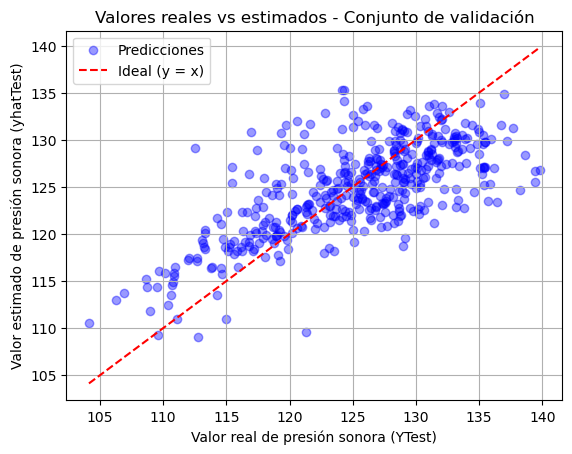

In [142]:
import matplotlib.pyplot as plt

plt.scatter(YTest, yhatTest, color="blue", alpha=0.4, label="Predicciones")

min_val = min(min(YTest), min(yhatTest))
max_val = max(max(YTest), max(yhatTest))
plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--", label="Ideal (y = x)")

plt.xlabel("Valor real de presión sonora (YTest)")
plt.ylabel("Valor estimado de presión sonora (yhatTest)")
plt.title("Valores reales vs estimados - Conjunto de validación")
plt.legend()
plt.grid(True)
plt.show()


Se observa que los puntos se agrupan en torno a la línea diagonal, lo que indica que el modelo logra capturar la tendencia general de los datos y realiza predicciones razonablemente precisas. Sin embargo, también aparecen dispersión y desviaciones, especialmente en los extremos, lo que evidencia que el modelo **subestima algunos valores altos y sobreestima algunos valores bajos**.  

Esta dispersión coincide con los resultados de las métricas previamente calculadas: un **$R^2 ≈ 0.489$** y **RSE ≈ 3.19**, lo que refleja que el modelo explica aproximadamente la mitad de la variabilidad y que los errores promedio en las predicciones son moderados.